In [4]:
!pip install opencv-python

     ---------------------------------------- 38.1/38.1 MB 1.3 MB/s eta 0:00:00


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

healthy_files = os.listdir("C:/Users/varna/Desktop/make seperate/cancer_images/health")
print("num of health imgs: ", len(healthy_files))
print(healthy_files[0:5])
print(healthy_files[-5:])

unhealthy_files = os.listdir("C:/Users/varna/Desktop/make seperate/cancer_images/unhealth")
print("num of unhealth imgs: ", len(unhealthy_files))
print(unhealthy_files[0:5])
print(unhealthy_files[-5:])

# LABELING
# Health --> 0
# UnHealth --> 1

# CREATE LABEL
health_labels = [0] * 2162
unhealth_labels = [1] * 990

labels = health_labels + unhealth_labels
print(len(labels))


num of health imgs:  2162
['MHIST_aab.png', 'MHIST_aae.png', 'MHIST_aag.png', 'MHIST_aah.png', 'MHIST_aai.png']
['MHIST_eqv.png', 'MHIST_era.png', 'MHIST_erb.png', 'MHIST_ere.png', 'MHIST_erf.png']
num of unhealth imgs:  990
['MHIST_aaa.png', 'MHIST_aac.png', 'MHIST_aad.png', 'MHIST_aaf.png', 'MHIST_aal.png']
['MHIST_eqx.png', 'MHIST_eqy.png', 'MHIST_eqz.png', 'MHIST_erc.png', 'MHIST_erd.png']
3152


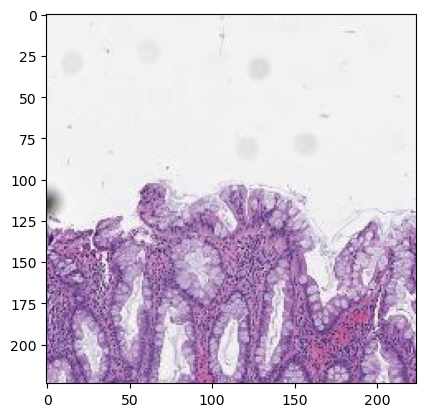

(224, 224, 3)


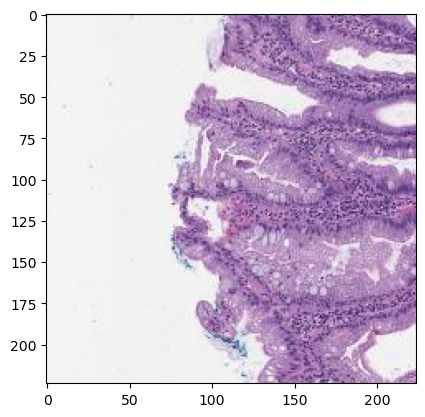

In [2]:
img = mpimg.imread('C:/Users/varna/Desktop/make seperate/cancer_images/health/MHIST_agx.png')
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread('C:/Users/varna/Desktop/make seperate/cancer_images/unhealth/MHIST_cpm.png')
print(img.shape)
imgplot = plt.imshow(img)
plt.show()


In [3]:
data = []
health_path = 'C:/Users/varna/Desktop/make seperate/cancer_images/health/'

for img_file in healthy_files[:990]:
    image = Image.open(health_path + img_file)
    # image = image.resize((224, 224))  # Uncomment this line to resize the images
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

unhealth_path = 'C:/Users/varna/Desktop/make seperate/cancer_images/unhealth/'

for img_file in unhealthy_files:
    image = Image.open(unhealth_path + img_file)
    # image = image.resize((224, 224))  # Uncomment this line to resize the images
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

print(len(data))
print(data[0].shape)


1980
(224, 224, 3)


In [4]:
# Note: Comment out the labels assignment if you are using the previously defined 'labels' variable.

# CREATE LABELS (If not done in previous cells)
one = [1] * 990
zero = [0] * 990
labels = one + zero
print(len(labels))

# CONVERT IMAGE LIST AND LABEL LIST INTO NUMPY ARRAY
X = np.array(data)
Y = np.array(labels)
type(Y)


1980


numpy.ndarray

In [5]:
# TRAIN-TEST SPLIT
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# SCALING
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

print(X.shape, X_train_scaled.shape, X_test.shape)


(1980, 224, 224, 3) (1584, 224, 224, 3) (396, 224, 224, 3)


In [7]:
!pip install tensorflow_hub

     -------------------------------------- 90.3/90.3 kB 340.5 kB/s eta 0:00:00


In [8]:
import tensorflow as tf
import tensorflow_hub as hub

# Load ResNet V2 50 model from TensorFlow Hub
resnet_model = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4'
pretrained_model = hub.KerasLayer(resnet_model, input_shape=(224, 224, 3), trainable=False)

num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,568,898
Trainable params: 4,098
Non-trainable params: 23,564,800
_________________________________________________________________


In [9]:
model.fit(X_train_scaled, Y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 75s 1s/step - loss: 0.5314 - acc: 0.7405
Epoch 2/10
50/50 [==============================] - 90s 2s/step - loss: 0.4161 - acc: 0.7986
Epoch 3/10
50/50 [==============================] - 90s 2s/step - loss: 0.3689 - acc: 0.8289
Epoch 4/10
50/50 [==============================] - 89s 2s/step - loss: 0.3428 - acc: 0.8561
Epoch 5/10
50/50 [==============================] - 90s 2s/step - loss: 0.3276 - acc: 0.8611
Epoch 6/10
50/50 [==============================] - 105s 2s/step - loss: 0.2999 - acc: 0.8737
Epoch 7/10
50/50 [==============================] - 106s 2s/step - loss: 0.2868 - acc: 0.8750
Epoch 8/10
50/50 [==============================] - 106s 2s/step - loss: 0.2824 - acc: 0.8801
Epoch 9/10
50/50 [==============================] - 106s 2s/step - loss: 0.2616 - acc: 0.8895
Epoch 10/10
50/50 [==============================] - 114s 2s/step - loss: 0.2499 - acc: 0.9028


In [10]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.4212 - acc: 0.8106
Test Loss = 0.4211728572845459
Test Accuracy = 0.810606062412262


Path of the image to be predicted: C:/Users/varna/Desktop/make seperate/cancer_images/unhealth/MHIST_cpm.png


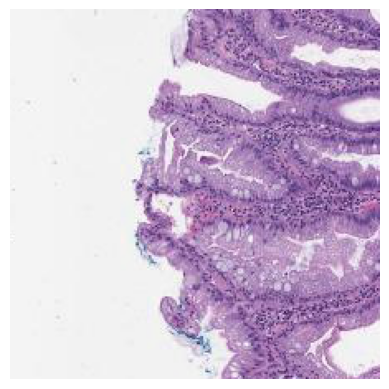

1/1 [==============================] - 0s 76ms/step
[[-0.16109824 -0.36462858]]
0
The image has cancer cells


In [13]:
# Predictive section
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize / 255
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
    print('The image is a healthy histopathology')
else:
    print('The image has cancer cells')


In [17]:
import matplotlib.pyplot as plt

# Train the model and collect the history
history = model.fit(X_train_scaled, Y_train, epochs=10, validation_data=(X_test_scaled, Y_test))

# Plot the loss vs. epochs graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')
plt.show()


Epoch 1/10
50/50 [==============================] - 148s 3s/step - loss: 0.1791 - acc: 0.9438 - val_loss: 0.4605 - val_acc: 0.8056
Epoch 2/10
50/50 [==============================] - 146s 3s/step - loss: 0.1688 - acc: 0.9489 - val_loss: 0.4449 - val_acc: 0.8131
Epoch 3/10
50/50 [==============================] - 153s 3s/step - loss: 0.1669 - acc: 0.9470 - val_loss: 0.4538 - val_acc: 0.8232
Epoch 4/10
50/50 [==============================] - 161s 3s/step - loss: 0.1617 - acc: 0.9577 - val_loss: 0.4494 - val_acc: 0.8030
Epoch 5/10
29/50 [================>.............] - ETA: 51s - loss: 0.1601 - acc: 0.9494

KeyboardInterrupt: 

#https://www.baeldung.com/cs/loss-vs-epoch-graphs#:~:text=Epoch-,Loss%20vs.,values%20recorded%20in%20successive%20epochs.
#from this link the above graph is underfitting

In [18]:
# Data Augmentation and Convert Data to Numpy Arrays
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

data = []
health_path = 'C:/Users/varna/Desktop/make seperate/cancer_images/health/'

for img_file in healthy_files[:990]:
    image = Image.open(health_path + img_file)
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

unhealth_path = 'C:/Users/varna/Desktop/make seperate/cancer_images/unhealth/'

for img_file in unhealthy_files:
    image = Image.open(unhealth_path + img_file)
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

print(len(data))
print(data[0].shape)



1980
(224, 224, 3)


In [19]:
# TRAIN-TEST SPLIT
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# SCALING
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Convert data to ImageDataGenerator-compatible format
datagen.fit(X_train_scaled)

print(X.shape, X_train_scaled.shape, X_test.shape)


(1980, 224, 224, 3) (1584, 224, 224, 3) (396, 224, 224, 3)


In [20]:
import tensorflow as tf
import tensorflow_hub as hub

# Load ResNet V2 50 model from TensorFlow Hub
resnet_model = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4'
pretrained_model = hub.KerasLayer(resnet_model, input_shape=(224, 224, 3), trainable=False)

num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,568,898
Trainable params: 4,098
Non-trainable params: 23,564,800
_________________________________________________________________


In [21]:
batch_size = 32
epochs = 10

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train_scaled, Y_train, batch_size=batch_size), 
                    steps_per_epoch=len(X_train_scaled) // batch_size,
                    epochs=epochs,
                    validation_data=(X_test_scaled, Y_test))


Epoch 1/10
49/49 [==============================] - 144s 3s/step - loss: 0.6348 - acc: 0.6733 - val_loss: 0.5551 - val_acc: 0.7273
Epoch 2/10
49/49 [==============================] - 166s 3s/step - loss: 0.4929 - acc: 0.7597 - val_loss: 0.5749 - val_acc: 0.7399
Epoch 3/10
49/49 [==============================] - 198s 4s/step - loss: 0.4473 - acc: 0.7880 - val_loss: 0.4843 - val_acc: 0.7854
Epoch 4/10
49/49 [==============================] - 182s 4s/step - loss: 0.4547 - acc: 0.7841 - val_loss: 0.5137 - val_acc: 0.7803
Epoch 5/10
49/49 [==============================] - 186s 4s/step - loss: 0.4292 - acc: 0.8028 - val_loss: 0.4767 - val_acc: 0.8030
Epoch 6/10
49/49 [==============================] - 181s 4s/step - loss: 0.4251 - acc: 0.8093 - val_loss: 0.4329 - val_acc: 0.8106
Epoch 7/10
49/49 [==============================] - 181s 4s/step - loss: 0.4150 - acc: 0.8093 - val_loss: 0.4351 - val_acc: 0.8182
Epoch 8/10
49/49 [==============================] - 180s 4s/step - loss: 0.4136 - a

In [22]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 15s 1s/step - loss: 0.4317 - acc: 0.8106
Test Loss = 0.431732714176178
Test Accuracy = 0.810606062412262


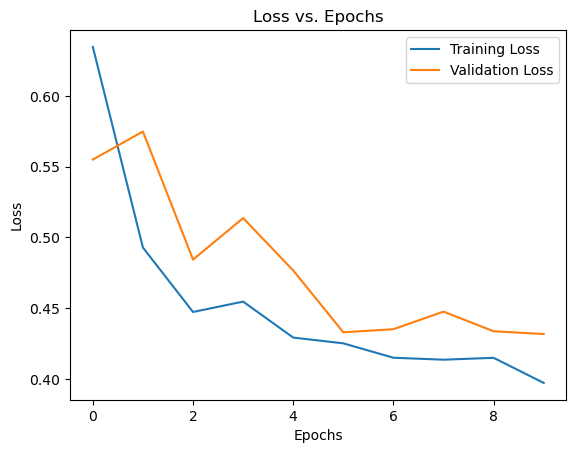

In [23]:
# Plot the loss vs. epochs graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')
plt.show()

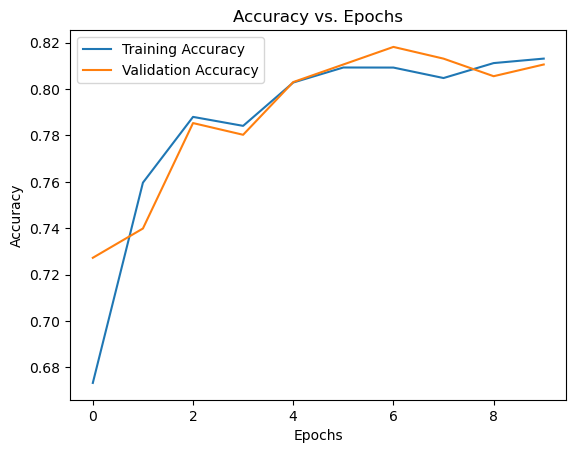

In [24]:
#accuracy vs epochs graphs
# Plot the accuracy vs. epochs graph
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')
plt.show()


13/13 [==============================] - 32s 2s/step


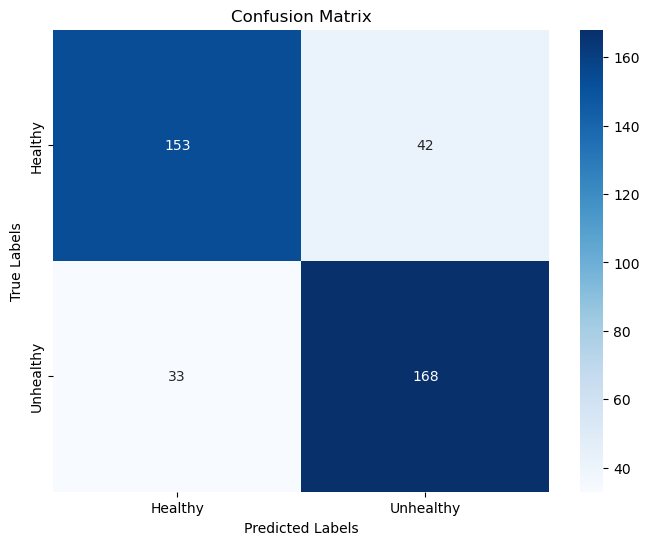

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test data
Y_pred = model.predict(X_test_scaled)
Y_pred_labels = np.argmax(Y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Unhealthy'], yticklabels=['Healthy', 'Unhealthy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
